<a href="https://colab.research.google.com/github/TAN-07/Data-Warehousing-Mining/blob/main/DMWAssign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment No. 01**

   Written by Tanvi Nirmal
   
   B.E.(Comp.)- B15

# Question No. 1)

From sklearn.datasets load digits dataset and do following:
* Classify digits (0 to 9) using KNN classifier. You can use different
values for k neighbors and need to figure out a value of K that gives
you a maximum score. You can manually try different values of K or
use gridsearchcv
* Plot confusion matrix
* Plot classification report

In [ ]:
# import the necessary packages
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
# load the MNIST digits dataset
mnist = datasets.load_digits()

# take the MNIST data and construct the training and testing split, using 85% of the
# data for training and 15% for testing

(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.15, random_state=42)

# now, let's take 10% of the training data and use that for validation

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [ ]:
# show the sizes of each data split

print("training data points: {}".format(len(trainLabels)))
print("testing data points: {}".format(len(testLabels)))
print("validation data points: {}".format(len(valLabels)))

training data points: 1374
testing data points: 270
validation data points: 153


In [ ]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kList = range(1, 50, 2)
accuracies = []

# loop over various values of k for the k-Nearest Neighbor classifier

for k in range(1, 50, 2):
          # train the k-Nearest Neighbor classifier with the current value of k
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("For k=%d, accuracy = %.2f%%" % (k, score * 100))
          accuracies.append(score)

For k=1, accuracy = 98.04%
For k=3, accuracy = 98.69%
For k=5, accuracy = 98.69%
For k=7, accuracy = 96.73%
For k=9, accuracy = 98.04%
For k=11, accuracy = 97.39%
For k=13, accuracy = 97.39%
For k=15, accuracy = 97.39%
For k=17, accuracy = 96.73%
For k=19, accuracy = 96.08%
For k=21, accuracy = 96.73%
For k=23, accuracy = 96.08%
For k=25, accuracy = 96.08%
For k=27, accuracy = 95.42%
For k=29, accuracy = 94.77%
For k=31, accuracy = 94.77%
For k=33, accuracy = 94.77%
For k=35, accuracy = 94.77%
For k=37, accuracy = 94.77%
For k=39, accuracy = 94.12%
For k=41, accuracy = 94.12%
For k=43, accuracy = 92.81%
For k=45, accuracy = 92.16%
For k=47, accuracy = 92.16%
For k=49, accuracy = 92.16%


In [ ]:
# find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

k=3 achieved highest accuracy of 98.69% on validation data


In [ ]:
# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kList[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
print(predictions[1])

9


In [ ]:
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA\n")
print(classification_report(testLabels, predictions))

print ("------- Confusion matrix -------")
print(confusion_matrix(testLabels,predictions))

EVALUATION ON TESTING DATA

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        24
           4       0.97      1.00      0.99        37
           5       0.97      1.00      0.99        33
           6       1.00      1.00      1.00        30
           7       1.00      0.96      0.98        26
           8       0.95      0.95      0.95        19
           9       0.97      0.91      0.94        34

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270

------- Confusion matrix -------
[[23  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  

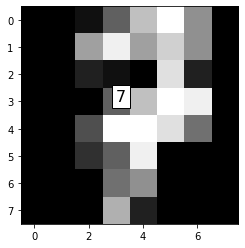

The digit may be : 7




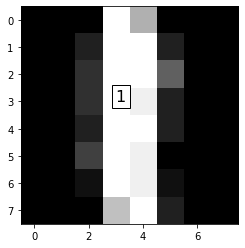

The digit may be : 1




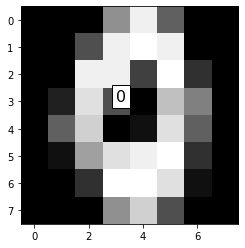

The digit may be : 0




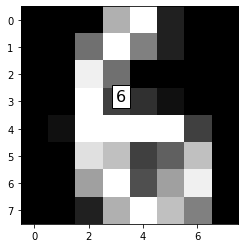

The digit may be : 6




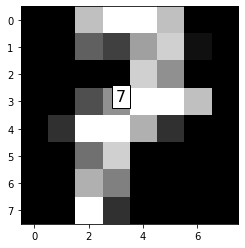

The digit may be : 7




In [ ]:
# loop over a few random digits

for i in np.random.randint(0, high=len(testLabels), size=(5,)):
         # grab the image and classify it
         image = testData[i]
         prediction = model.predict([image])[0]
         
         # show the prediction
         
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((8,8))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         plt.show()
         cv2.waitKey(0)
         print("The digit may be : {}\n\n".format(prediction))

# Question No. 2)

Build decision tree model to predict survival based on certain parameters
CSV file is available to download at  https://www.kaggle.com/c/titanic/data
In this file using following columns build a model to predict if person would
survive or not,
1. Pclass
2. Sex
3. Age
4. Fare

Calculate score of your model.

In [63]:
import pandas as pd
url = "https://raw.githubusercontent.com/TAN-07/Data-Warehousing-Mining/main/train.csv"

In [91]:
titanic = pd.read_csv(url)          #dataframe

In [92]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
#removing extra columns from dataset
titanic = titanic[['Pclass','Sex','Age','Fare','Survived']]
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x=='female' else 0)
titanic.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [94]:
titanic.describe()

,Pclass,Sex,Age,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,32.204208,0.383838
std,0.836071,0.477990,14.526497,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,7.910400,0.000000
50%,3.000000,0.000000,28.000000,14.454200,0.000000
75%,3.000000,1.000000,38.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,512.329200,1.000000


In [95]:
#removing rows with missing values
titanic = titanic.dropna()
titanic.describe()

,Pclass,Sex,Age,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,0.365546,29.699118,34.694514,0.406162
std,0.838250,0.481921,14.526497,52.918930,0.491460
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,1.000000,0.000000,20.125000,8.050000,0.000000
50%,2.000000,0.000000,28.000000,15.741700,0.000000
75%,3.000000,1.000000,38.000000,33.375000,1.000000
max,3.000000,1.000000,80.000000,512.329200,1.000000


In [96]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.655914
1,2,0.479769
2,3,0.239437


In [97]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.754789
0,0,0.205298


In [102]:
#we use 90% of data for training
n_train = 642 # n_train = 0.85 * 714 = 606
n_test = 72 # n_test = 108

X = titanic[['Pclass','Sex','Age','Fare']]
y = titanic[['Survived']]

X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (642, 4)
y_train (642, 1)
X_test (72, 4)
y_test (72, 1)


In [103]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(random_state=42)
classifier = classifier.fit(X_train,y_train)

In [106]:
#plotting decision tree

import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render()

'Source.gv.pdf'

In [105]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

print('Accuracy is',accuracy_score(y_pred,y_test))

Accuracy is 0.8611111111111112
